In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.stats import kurtosis,skew
from sklearn.linear_model import LinearRegression,Ridge
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.tree import DecisionTreeRegressor,ExtraTreeRegressor
from sklearn.ensemble import RandomForestRegressor,BaggingRegressor,GradientBoostingRegressor,ExtraTreesRegressor
#import xgboost,lightgbm
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error
from sklearn import linear_model
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler,MinMaxScaler,StandardScaler
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error


/root/anaconda3/lib/python3.7/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [3]:
d1=pd.read_csv('Train_UWu5bXk.csv')
# d2=pd.read_csv('test1.csv')
# data=pd.concat([d1,d2],axis=0)
data=d1
d1.shape

(8523, 12)

In [4]:
data['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [5]:
data['Item_Fat_Content']=data['Item_Fat_Content'].map({'LF':0,'Low Fat':0,'Regular':1,'low fat':0,'reg':1})

In [6]:
data.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [7]:
yy=data.groupby('Item_Identifier')['Item_Weight'].mean()
yy=dict(yy)
data['Item_Weight'].fillna(-1.0,inplace=True)
def ff(xx,d):
    if(d==-1.0):
        return yy[xx]
    else:
        return d
data['Item_Weight']=data.apply(lambda x : ff(x['Item_Identifier'],x['Item_Weight']),axis=1)

In [8]:
data.isnull().sum()

Item_Identifier                 0
Item_Weight                     4
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [9]:
data.groupby('Item_Type')['Item_Weight'].median()

Item_Type
Baking Goods             11.6500
Breads                   10.6000
Breakfast                10.6950
Canned                   12.3500
Dairy                    13.3500
Frozen Foods             12.8500
Fruits and Vegetables    13.1000
Hard Drinks               9.8975
Health and Hygiene       12.1500
Household                13.5000
Meat                     12.3500
Others                   14.5000
Seafood                  11.6500
Snack Foods              13.1500
Soft Drinks              11.8000
Starchy Foods            13.5000
Name: Item_Weight, dtype: float64

In [10]:
data['Item_Weight'].fillna(10.0,inplace=True)

In [11]:
data.groupby('Outlet_Type')['Outlet_Size'].value_counts()

Outlet_Type        Outlet_Size
Grocery Store      Small           528
Supermarket Type1  Small          1860
                   High            932
                   Medium          930
Supermarket Type2  Medium          928
Supermarket Type3  Medium          935
Name: Outlet_Size, dtype: int64

In [12]:
data.groupby(['Outlet_Type','Outlet_Size'])['Item_Outlet_Sales'].mean()

Outlet_Type        Outlet_Size
Grocery Store      Small           340.329723
Supermarket Type1  High           2298.995256
                   Medium         2348.354635
                   Small          2358.343066
Supermarket Type2  Medium         1995.498739
Supermarket Type3  Medium         3694.038558
Name: Item_Outlet_Sales, dtype: float64

In [13]:
data['Outlet_Size'].fillna('Small',inplace=True)
# data.Outlet_Size

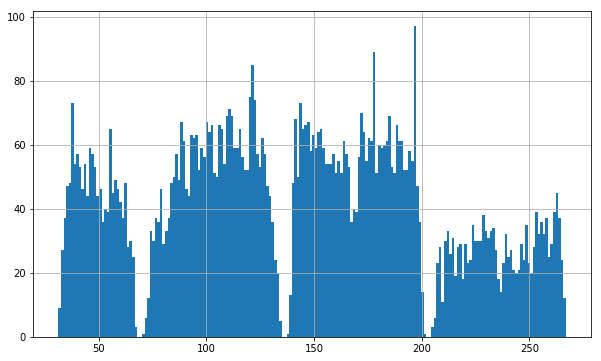

In [14]:
data['Item_MRP'].hist(bins=200,figsize=(10,6))

In [15]:
np.where(data.Item_Visibility<=0)

(array([   3,    4,    5,   10,   32,   33,   46,   60,   72,   79,  107,
         114,  144,  156,  175,  212,  214,  216,  219,  228,  307,  349,
         370,  379,  386,  388,  411,  423,  447,  472,  478,  482,  499,
         500,  505,  520,  535,  545,  559,  576,  596,  600,  602,  613,
         623,  633,  651,  677,  687,  722,  737,  741,  747,  781,  791,
         792,  801,  802,  838,  840,  844,  900,  906,  943,  955,  968,
        1063, 1074, 1094, 1113, 1118, 1120, 1143, 1145, 1146, 1179, 1197,
        1212, 1243, 1263, 1292, 1326, 1335, 1346, 1350, 1351, 1390, 1391,
        1405, 1418, 1450, 1454, 1463, 1467, 1472, 1483, 1486, 1505, 1508,
        1511, 1537, 1585, 1623, 1633, 1636, 1643, 1649, 1665, 1691, 1693,
        1727, 1758, 1760, 1761, 1768, 1782, 1809, 1851, 1862, 1893, 1898,
        1913, 1953, 1972, 2007, 2018, 2022, 2053, 2055, 2062, 2138, 2192,
        2217, 2249, 2330, 2331, 2340, 2347, 2376, 2381, 2394, 2397, 2469,
        2484, 2521, 2522, 2545, 2547, 

In [16]:
yy=data[data.Item_Visibility>0.0].groupby('Item_Identifier')['Item_Visibility'].mean()
yy=dict(yy)

def ff(x,y):
    if(x==0.0):
        return yy[y]
    else:
        return x
data['Item_Visibility']=data.apply(lambda x : ff(x['Item_Visibility'],x['Item_Identifier']),axis=1)

In [17]:
ya=data.groupby('Item_Identifier')['Item_Visibility'].mean()
ya=dict(ya)

def ff(x,y):
    return (x/ya[y])
data['itemimportance']=data.apply(lambda x : ff(x['Item_Visibility'],x['Item_Identifier']),axis=1)

data['itemimportance'].describe()

count    8523.000000
mean        1.000000
std         0.185650
min         0.677918
25%         0.889593
50%         0.997083
75%         1.001012
max         1.614811
Name: itemimportance, dtype: float64

In [18]:

data['years']=2018-data['Outlet_Establishment_Year']
del data['Outlet_Establishment_Year']

lb=LabelEncoder()
lb.fit(data['Item_Type'])
data['Item_Type']=lb.transform(data['Item_Type'])
lb=LabelEncoder()


lb.fit(data['Outlet_Identifier'])
data['Outlet_Identifier']=lb.transform(data['Outlet_Identifier'])

lb=LabelEncoder()
lb.fit(data['Outlet_Size'])
data['Outlet_Size']=lb.transform(data['Outlet_Size'])

lb=LabelEncoder()
lb.fit(data['Outlet_Location_Type'])
data['Outlet_Location_Type']=lb.transform(data['Outlet_Location_Type'])

lb=LabelEncoder()
lb.fit(data['Outlet_Type'])
data['Outlet_Type']=lb.transform(data['Outlet_Type'])


In [19]:
data.isnull().sum()

Item_Identifier         0
Item_Weight             0
Item_Fat_Content        0
Item_Visibility         0
Item_Type               0
Item_MRP                0
Outlet_Identifier       0
Outlet_Size             0
Outlet_Location_Type    0
Outlet_Type             0
Item_Outlet_Sales       0
itemimportance          0
years                   0
dtype: int64

In [20]:
data.describe()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,itemimportance,years
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.874071,0.352693,0.070749,7.226681,140.992782,4.722281,1.453596,1.112871,1.201220,2181.288914,1.000000,20.168133
std,4.645425,0.477836,0.050313,4.209990,62.275067,2.837201,0.683084,0.812757,0.796459,1706.499616,0.185650,8.371760
min,4.555000,0.000000,0.003575,0.000000,31.290000,0.000000,0.000000,0.000000,0.000000,33.290000,0.677918,9.000000
25%,8.785000,0.000000,0.031395,4.000000,93.826500,2.000000,1.000000,0.000000,1.000000,834.247400,0.889593,14.000000
50%,12.600000,0.000000,0.058100,6.000000,143.012800,5.000000,2.000000,1.000000,1.000000,1794.331000,0.997083,19.000000
75%,16.850000,1.000000,0.098867,10.000000,185.643700,7.000000,2.000000,2.000000,1.000000,3101.296400,1.001012,31.000000
max,21.350000,1.000000,0.328391,15.000000,266.888400,9.000000,2.000000,2.000000,3.000000,13086.964800,1.614811,33.000000


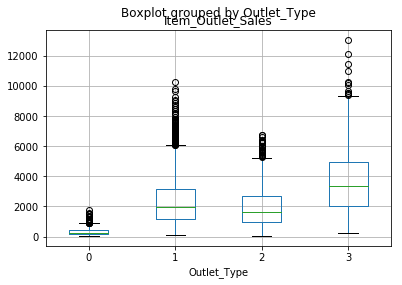

In [21]:
data.boxplot(by='Outlet_Type',column='Item_Outlet_Sales')

In [22]:
del data['Item_Identifier']
test=data[8500:]
data=data[0:8500]
yd=data['Item_Outlet_Sales']
del data['Item_Outlet_Sales']
del test['Item_Outlet_Sales']
data.shape,yd.shape,test.shape

((8500, 11), (8500,), (23, 11))

In [23]:
yy=yd

In [24]:
np.where(np.isnan(data))

(array([], dtype=int64), array([], dtype=int64))

In [25]:
data.isnull().sum()

Item_Weight             0
Item_Fat_Content        0
Item_Visibility         0
Item_Type               0
Item_MRP                0
Outlet_Identifier       0
Outlet_Size             0
Outlet_Location_Type    0
Outlet_Type             0
itemimportance          0
years                   0
dtype: int64

In [26]:
#simple linear regression with cross validation of 5 fold
avg=0.0
skf=KFold(n_splits=5)
skf.get_n_splits(data)
for ti,tj in skf.split(data):
    dx,tx=data.iloc[ti],data.iloc[tj]
    dy,ty=yy[ti],yy[tj]
    lm=make_pipeline(MinMaxScaler(), linear_model.LinearRegression(n_jobs=-1))
    lm.fit(dx,dy)
    yu=np.sqrt(mean_squared_error(y_true=ty,y_pred=lm.predict(tx)))
    avg=avg+yu
    print(yu)

print("AVG  RMSE::",avg/5)

1182.750863263586
1150.278513792006
1152.0642761312756
1163.5739949286117
1191.4214846676373
AVG  RMSE:: 1168.0178265566233


In [27]:
#simple elasticnet regression with cross validation of 5 fold
avg=0.0
skf=KFold(n_splits=5)
skf.get_n_splits(data)
for ti,tj in skf.split(data):
    dx,tx=data.iloc[ti],data.iloc[tj]
    dy,ty=yy[ti],yy[tj]
    lm=make_pipeline(StandardScaler(), linear_model.ElasticNet(l1_ratio=0.6,alpha=0.001))
    lm.fit(dx,dy)
    yu=np.sqrt(mean_squared_error(y_true=ty,y_pred=lm.predict(tx)))
    avg=avg+yu
    print(yu)

print("AVG  RMSE::",avg/5)

1182.7779299614663
1150.2720173247146
1152.0511903217284
1163.5844699829454
1191.396332330722
AVG  RMSE:: 1168.0163879843153


In [28]:
#simple Decision Tree regression with cross validation of 5 fold
avg=0.0
skf=KFold(n_splits=5)
skf.get_n_splits(data)
for ti,tj in skf.split(data):
    dx,tx=data.iloc[ti],data.iloc[tj]
    dy,ty=yy[ti],yy[tj]
    lm=DecisionTreeRegressor(max_depth=5)
    lm.fit(dx,dy)
    yu=np.sqrt(mean_squared_error(y_true=ty,y_pred=lm.predict(tx)))
    avg=avg+yu
    print(yu)

print("AVG  RMSE::",avg/5)

1110.8036618358874
1089.2522211857552
1098.3083598819362
1073.752817450136
1098.6251787039776
AVG  RMSE:: 1094.1484478115385


In [82]:
#simple Random Forest Tree regression with cross validation of 5 fold
avg=0.0
skf=KFold(n_splits=5)
skf.get_n_splits(data)
for ti,tj in skf.split(data):
    dx,tx=data.iloc[ti],data.iloc[tj]
    dy,ty=yy[ti],yy[tj]
    lm=RandomForestRegressor(max_depth=5,n_jobs=-1,n_estimators=100)
    lm.fit(dx,dy)
    yu=np.sqrt(mean_squared_error(y_true=ty,y_pred=lm.predict(tx)))
    avg=avg+yu
    print(yu)

print("AVG  RMSE::",avg/5)

1101.9124214631652
1079.9706058781178
1084.868572424402
1075.670668858084
1082.2907380547292
AVG  RMSE:: 1084.9426013356997
